# Project 2
Can we predict a player's Slugging Percentage based on their Hits, Doubles, Triples, Home Runs, and At-Bats?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
# Loading the data
batting_df = pd.read_csv(r"C:\Users\timha\Project_2\LAD_batting.csv")
hitters_df = pd.read_csv(r"C:\Users\timha\Project_2\batting_2023_data.csv")

# Column names for both data sets 
print("\nColumns in batting_df (Dodgers data):")
print(batting_df.columns)

print("\nColumns in hitters_df (MLB hitters data):")
print(hitters_df.columns)


Columns in batting_df (Dodgers data):
Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')

Columns in hitters_df (MLB hitters data):
Index(['Name', 'Team', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',
       ...
       'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'Batting', 'Base Running',
       'Fielding', 'WAR'],
      dtype='object', length=105)


# Data Preparation

In [ ]:
# Selected relevant columns from batting_df
batting_df = batting_df[['Hits', 'Doubles', 'Triples', 'Home_Runs', 'At_Bats', 'Slugging_Percentage']]
print(f"Selected columns in batting_df: {batting_df.columns.tolist()}")

Selected columns in batting_df: ['Hits', 'Doubles', 'Triples', 'Home_Runs', 'At_Bats', 'Slugging_Percentage']


In [ ]:
# Renamed and selected relevant columns from hitters_df
hitters_df = hitters_df.rename(columns={
    'H': 'Hits',
    '2B': 'Doubles',
    '3B': 'Triples',
    'HR': 'Home_Runs',
    'AB': 'At_Bats'
})
hitters_df = hitters_df[['Hits', 'Doubles', 'Triples', 'Home_Runs', 'At_Bats']]
print(f"Selected columns in hitters_df: {hitters_df.columns.tolist()}")

Selected columns in hitters_df: ['Hits', 'Doubles', 'Triples', 'Home_Runs', 'At_Bats']


In [ ]:
# Calculated Slugging Percentage for hitters_df
print("\nCalculating Slugging Percentage for MLB hitters data...")
hitters_df['Slugging_Percentage'] = (
    (hitters_df['Hits'] - hitters_df['Doubles'] - hitters_df['Triples'] - hitters_df['Home_Runs']) +
    (2 * hitters_df['Doubles']) + 
    (3 * hitters_df['Triples']) + 
    (4 * hitters_df['Home_Runs'])
) / hitters_df['At_Bats']

# Dropped rows where At_Bats is 0 to avoid division by zero
hitters_df = hitters_df[hitters_df['At_Bats'] > 0]
print("First few rows of hitters_df after calculating Slugging Percentage:")
print(hitters_df.head())


Calculating Slugging Percentage for MLB hitters data...
First few rows of hitters_df after calculating Slugging Percentage:
   Hits  Doubles  Triples  Home_Runs  At_Bats  Slugging_Percentage
0    45        9        0          7      221             0.339367
1    72       20        1         14      270             0.503704
2    37        7        0          1      147             0.319728
3    65       17        0          9      289             0.377163
4   107       21        4          9      464             0.351293


In [ ]:
# Combined the datasets
print("\nCombining Dodgers and MLB hitters datasets...")
combined_df = pd.concat([batting_df, hitters_df], ignore_index=True)
print(f"Combined dataset shape: {combined_df.shape}")
print("First few rows of combined dataset:")
print(combined_df.head())


Combining Dodgers and MLB hitters datasets...
Combined dataset shape: (3219, 6)
First few rows of combined dataset:
   Hits  Doubles  Triples  Home_Runs  At_Bats  Slugging_Percentage
0   121       21        2         19      464                0.438
1   211       59        2         29      637                0.567
2    50       15        4          7      256                0.367
3    91       16        1          5      385                0.322
4   102       17        1         36      482                0.475


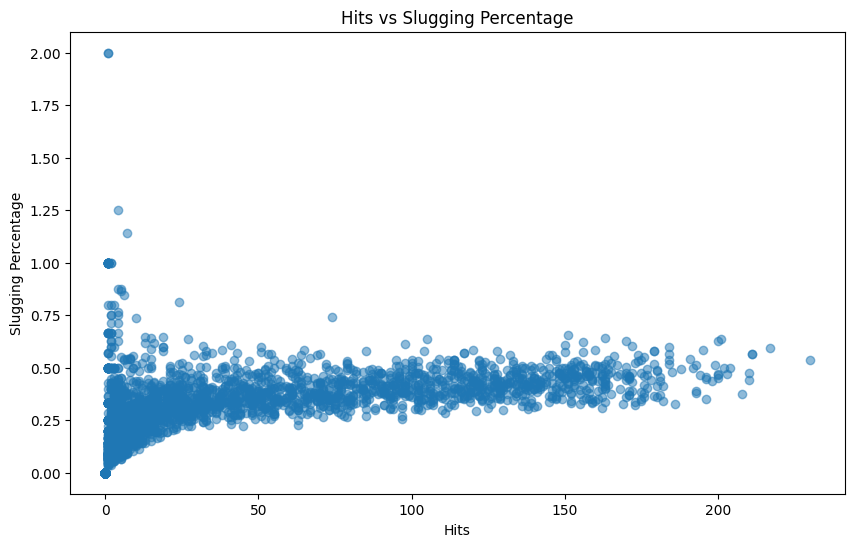

In [211]:
# Scatter plot of Hits vs Slugging Percentage
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Hits'], combined_df['Slugging_Percentage'], alpha=0.5)
plt.title('Hits vs Slugging Percentage')
plt.xlabel('Hits')
plt.ylabel('Slugging Percentage')
plt.show()


In [205]:
# Prepare features and target
print("\nPreparing features and target for model training...")
X = combined_df[['Hits', 'Doubles', 'Triples', 'Home_Runs', 'At_Bats']]
y = combined_df['Slugging_Percentage']

print("Features:")
print(X.columns.tolist())
print(f"Number of samples: {len(X)}")


Preparing features and target for model training...
Features:
['Hits', 'Doubles', 'Triples', 'Home_Runs', 'At_Bats']
Number of samples: 3219


# Splitting the data into training and testing sets

In [216]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 2575
Testing set size: 644


In [215]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [214]:
# Make predictions and calculate R-squared
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"\nR-squared: {r2:.4f}")


R-squared: 0.9821



Creating Predicted vs Actual Slugging Percentage plot...


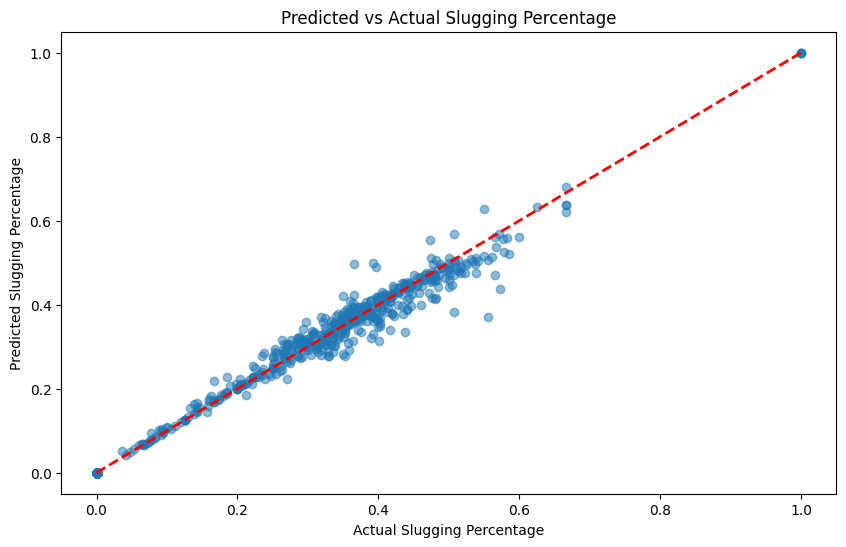

In [218]:
# Scatter plot of Predicted vs Actual Slugging Percentage
print("\nCreating Predicted vs Actual Slugging Percentage plot...")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Slugging Percentage')
plt.xlabel('Actual Slugging Percentage')
plt.ylabel('Predicted Slugging Percentage')
plt.show()